# Project 1 Predict weather a loan will be defalted or paid


# Data cleaning 

In [87]:
import pandas as pd 
import numpy as np 
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso,Ridge

 #for logestic regresion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split

#for DecisionTree
from sklearn.tree import DecisionTreeClassifier

#for knn
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [88]:
df=pd.read_csv('Data file.csv')
print(df)

        Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_d

In [89]:
df.shape

(209593, 37)

In [90]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [91]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [92]:
df= df.drop(columns=['Unnamed: 0','pcircle'  ,'pdate','msisdn' ], axis=1) #  as these column are not significant in findig our prediction so we can drop it 

In [93]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [94]:
# as we can see in row no 1 (count ) there is no null value in the data 

In [95]:
correlation=df.corr()

<AxesSubplot:>

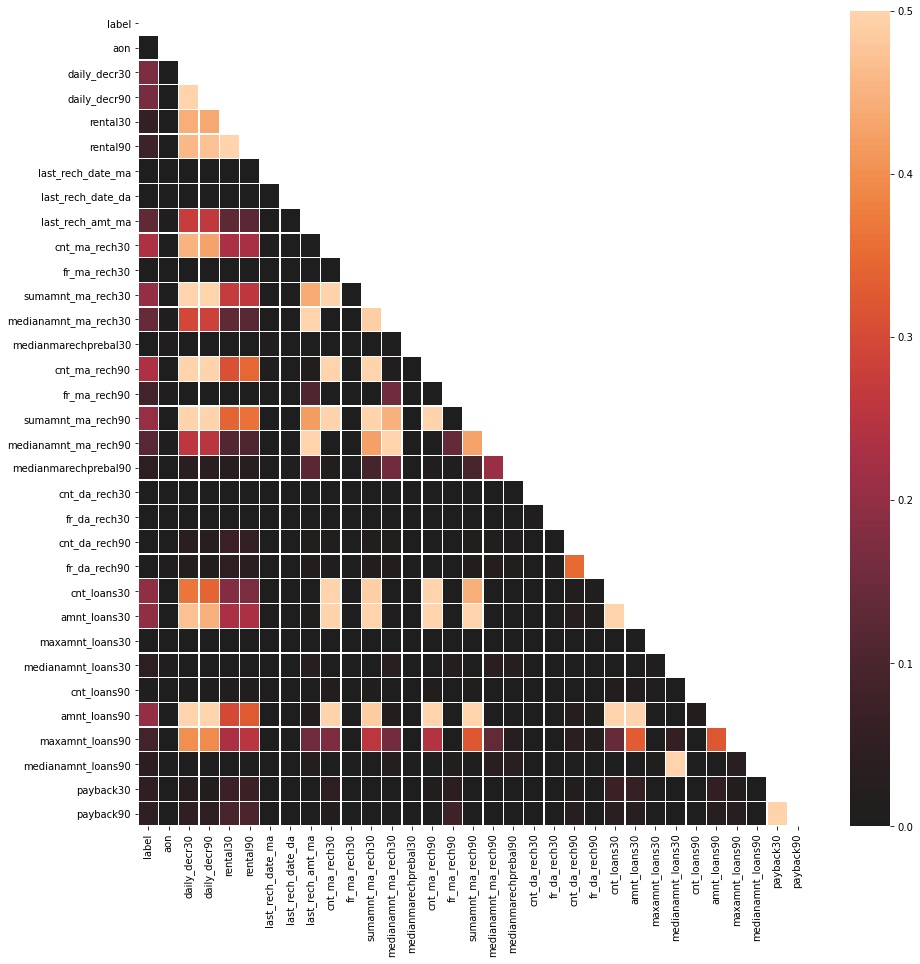

In [96]:
fig, ax = plt.subplots(figsize=(15,15)) 
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(correlation,linewidth=.3,vmin=0,vmax=.5,center = 0,linecolor='white',mask=mask)

In [97]:
#sns.pairplot(df)

# model 1 logestic regresion

In [98]:
df.describe

<bound method NDFrame.describe of         label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0       

In [99]:
df.shape

(209593, 33)

In [100]:
x=df.iloc[ : ,1:33]

In [101]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [102]:
y=df.iloc[:,:1]

In [103]:
y

,label
0,0
1,1
2,1
3,1
4,1
...,...
209588,1
209589,1
209590,1
209591,1


In [104]:
y.shape

(209593, 1)

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [106]:
x_train.shape

(140427, 32)

In [107]:
x_test.shape

(69166, 32)

In [108]:
y_train.shape

(140427, 1)

In [109]:
y_test.shape

(69166, 1)

In [110]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.08731747393438893

In [111]:
ls.coef_

array([-1.99701070e-08,  1.18140780e-06, -6.07126065e-07, -1.35906725e-05,
        8.80096086e-06,  1.42199860e-08,  3.48031731e-09,  6.44405041e-06,
        0.00000000e+00, -2.27097141e-09,  2.07559131e-06,  1.19400326e-05,
       -1.50906992e-08,  4.79948856e-03,  2.00080123e-03, -4.71058398e-07,
       -1.52511420e-06,  1.71459733e-05,  2.47995914e-07,  9.57086383e-09,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  8.53598205e-04,
       -3.74329753e-08,  0.00000000e+00,  6.09237725e-06,  6.66887070e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.51983676e-04])

In [112]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.10300209250657921

In [113]:
rd.coef_

array([[-2.05975833e-08,  1.44176385e-06, -1.96196635e-07,
        -1.42245451e-05,  8.86695563e-06,  1.05234264e-08,
         3.69149269e-09,  8.08393686e-06,  1.76828964e-02,
        -1.09303749e-09, -3.40501330e-06,  1.80719183e-05,
        -1.12544563e-08,  1.75487493e-03,  2.69136841e-03,
         5.82321277e-07, -7.98952306e-07,  1.45612170e-05,
         2.52754049e-07,  1.10693890e-08,  2.13105433e-03,
        -3.15944430e-03,  1.73752425e-02, -2.38191651e-03,
        -6.32351099e-08,  6.57985855e-02,  7.28226515e-06,
         4.60460049e-04,  4.62107360e-03,  1.72892228e-02,
         9.97023402e-04,  4.67565767e-04]])

In [114]:
lg=LogisticRegression()

In [115]:
lg.fit(x_train,y_train)

LogisticRegression()

In [116]:
pred=lg.predict(x_test)

In [117]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [118]:
accuracy_score(y_test,pred)

0.868287887112165

In [119]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

-0.19873344952844607


r2 score is decreased by using lasso and ridge regression


In [120]:
print ("error")
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean absolute error",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))

error
mean absolute error 0.13171211288783508
mean square error 0.13171211288783508


In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
confusion_matrix(y_test,pred)

array([[ 1713,  6979],
       [ 2131, 58343]], dtype=int64)

In [123]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.45      0.20      0.27      8692
           1       0.89      0.96      0.93     60474

    accuracy                           0.87     69166
   macro avg       0.67      0.58      0.60     69166
weighted avg       0.84      0.87      0.85     69166



In [124]:
# decission tree

In [125]:
dtc=DecisionTreeClassifier()   #(critererion='gint') by default  ,(critererion='entropy')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print('\n')
print(confusion_matrix(y_test,preddtc))
print('\n')
print(classification_report(y_test,preddtc))

0.8655987045658271


[[ 4337  4355]
 [ 4941 55533]]


              precision    recall  f1-score   support

           0       0.47      0.50      0.48      8692
           1       0.93      0.92      0.92     60474

    accuracy                           0.87     69166
   macro avg       0.70      0.71      0.70     69166
weighted avg       0.87      0.87      0.87     69166



In [126]:
# knn

In [127]:
knn=KNeighborsClassifier()   #(k=10)
knn.fit(x_train,y_train)
predknn=dtc.predict(x_test)
print(accuracy_score(y_test,predknn))
print('\n')
print(confusion_matrix(y_test,predknn))
print('\n')
print(classification_report(y_test,predknn))

0.8655987045658271


[[ 4337  4355]
 [ 4941 55533]]


              precision    recall  f1-score   support

           0       0.47      0.50      0.48      8692
           1       0.93      0.92      0.92     60474

    accuracy                           0.87     69166
   macro avg       0.70      0.71      0.70     69166
weighted avg       0.87      0.87      0.87     69166

